In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler

In [98]:
with open('../../Data/itemPrices.pickle','rb') as f:
    itemPrices = pickle.load(f)
with open('../../Data/itemInfo.pickle','rb') as f:
    itemInfo = pickle.load(f)

In [5]:
itemPrices['Abyssal_whip']

[(1437350400, 2484019, -1),
 (1437436800, 2473445, -1),
 (1437523200, 2457640, -1),
 (1437609600, 2438185, -1),
 (1437696000, 2443962, -1),
 (1437782400, 2438215, -1),
 (1437868800, 2431943, -1),
 (1437955200, 2424259, -1),
 (1438041600, 2412965, -1),
 (1438128000, 2398018, -1),
 (1438214400, 2363156, -1),
 (1438300800, 2314904, -1),
 (1438387200, 2328940, -1),
 (1438473600, 2323435, -1),
 (1438560000, 2318483, -1),
 (1438646400, 2314612, -1),
 (1438732800, 2303838, -1),
 (1438819200, 2297454, -1),
 (1438905600, 2289655, -1),
 (1438992000, 2280591, -1),
 (1439078400, 2266688, -1),
 (1439164800, 2254362, -1),
 (1439251200, 2249053, -1),
 (1439337600, 2246238, -1),
 (1439424000, 2242409, -1),
 (1439510400, 2253964, -1),
 (1439596800, 2285227, -1),
 (1439683200, 2371742, -1),
 (1439769600, 2377700, -1),
 (1439856000, 2362540, -1),
 (1439942400, 2357975, -1),
 (1440028800, 2347975, -1),
 (1440115200, 2339109, -1),
 (1440201600, 2318157, -1),
 (1440288000, 2290578, -1),
 (1440374400, 227178

In [99]:
itemInfo['Abyssal_whip']

{'members': 'True',
 'edible': 'False',
 'update': '/w/Update:Slayer_Skill',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Abyssal_whip.png',
 'lowAlch': '48000',
 'examine': 'A weapon from the abyss.',
 'highAlch': '72000',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'True',
 'weight': '0.453',
 'released': '26 January 2005',
 'storeCurrency': 'N/A',
 'name': 'Abyssal_whip',
 'alchable': 'True',
 'exchangePrice': '2622266',
 'tradeable': 'True',
 'buyLimit': '70',
 'noteable': 'True',
 'stackable': 'False'}

In [6]:
def priceChanges(prices):
    absChange = [0]*(len(prices)-1)
    percChange = [0]*(len(prices)-1)
    for i in range(0,len(prices)-1):
        absChange[i] = prices[i+1]-prices[i]
        percChange[i] = absChange[i]/prices[i]
    return absChange,percChange

def marginChanges(prices,buylimit):
    absChange = [0]*(len(prices)-1)
    percChange = [0]*(len(prices)-1)
    for i in range(0,len(prices)-1):
        absChange[i] = prices[i+1]*buylimit-prices[i]*buylimit
        percChange[i] = absChange[i]/(prices[i]*buylimit)
    return absChange,percChange

In [64]:
prices = [a[1] for a in itemPrices['Abyssal_whip']]
changes = priceChanges(prices)[0]

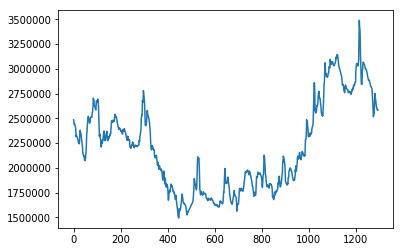

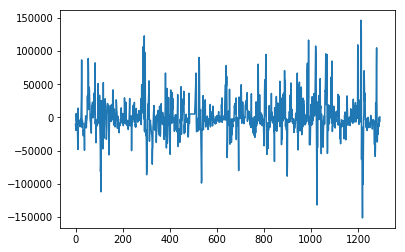

In [65]:
plt.plot(prices)
plt.show()
plt.plot(changes)
plt.show()

In [51]:
def minMax(data):
    d = []
    ma = max(data)
    mi = min(data)
    for i in range(len(data)):
        d.append((data[i]-mi)/(ma-mi))
    return d

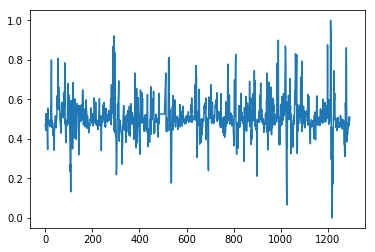

In [87]:
s_changes = minMax(changes)
plt.plot(s_changes)
plt.show()

In [88]:
x = []
for i in range(len(s_changes)-5):
    x.append(s_changes[i:i+5])
print(x[0],x[-1])

[0.4727908305603173, 0.45520822829484725, 0.4429397331182145, 0.5277503277200767, 0.4890154952774697] [0.481570367382609, 0.4637793687607139, 0.5084736647507647, 0.4899532788813821, 0.4864340694430439]


In [89]:
y = []
for i in range(5,len(s_changes)):
    y.append(s_changes[i])
print(y[0],y[1],y[-2],y[-1])

0.4872508487109677 0.48250478975496625 0.4864340694430439 0.510493764915465


In [90]:
x_train = np.array(x[:int(len(x)*.8)])
y_train = np.array(y[:int(len(y)*.8)])
x_test = np.array(x[int(len(x)*.8):])
y_test = np.array(y[int(len(y)*.8):])
print(len(x_train),len(y_train),len(x_test),len(y_test))
print(x_train[0],y_train[0],x_test[0],y_test[0])

1031 1031 258 258
[0.47279083 0.45520823 0.44293973 0.52775033 0.4890155 ] 0.4872508487109677 [0.53780713 0.52633861 0.61876239 0.58964741 0.49764378] 0.5295687539914625


In [144]:
model = Sequential()
model.add(Dense(5, input_dim=5))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [145]:
sgd = SGD(lr=0.1)
model.compile(loss='mse',
              optimizer=sgd,
              metrics=['mse'])

history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=1)
score = model.evaluate(x_test, y_test, batch_size=1)
print(score)

Epoch 1/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 2/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 3/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 4/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 5/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 6/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 7/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 8/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 9/10
1031/1031 [==============================] - 3s 3ms/step - loss: 0.0063 - mean_squared_error:

dict_keys(['loss', 'mean_squared_error'])


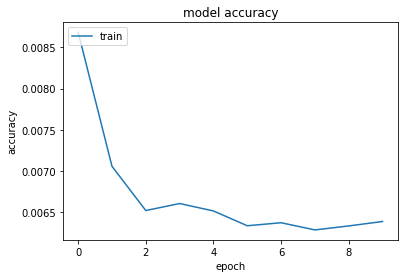

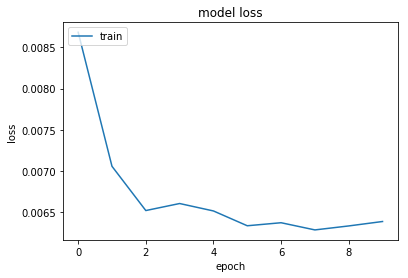

In [146]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

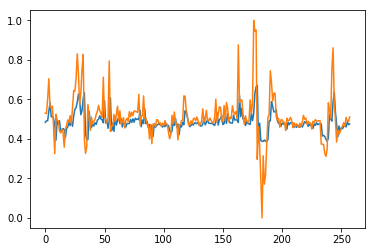

In [147]:
y_pred = model.predict(x_test)
plt.plot(y_pred)
plt.plot(y_test)

In [137]:
def modelProfit(x_arr,y_arr,model,data,buyLimit):
    buyLimit = int(buyLimit)
    buyers = [10**5,10**6,10**7,10**8,10**9,10**10]
    invent = [0] * len(buyers)
    for i in range(len(x_arr)):
        x = x_arr[i]
        #print(x,y_arr[i])
        y_pred = model.predict(x_arr[i].reshape(1,-1))
        if y_pred>=x[0]:
            for b in range(len(buyers)):
                buy = buyers[b]//data[i]
                if buy>buyLimit:
                    buy = buyLimit
                invent[b] += buy
                buyers[b] -= buy * data[i]
        elif y_pred<x[0]:
            for b in range(len(buyers)):
                buyers[b] += invent[b] * data[i]
                invent[b] = 0
    for b in range(len(buyers)):
        buyers[b] += invent[b] * data[i]
    init = [10**5,10**6,10**7,10**8,10**9,10**10]
    return [(buyers[i]-init[i])/init[i] for i in range(len(buyers))]

def perfectProfit(data,buyLimit):
    buyLimit = int(buyLimit)
    buyers = [10**5,10**6,10**7,10**8,10**9,10**10]
    invent = [0] * len(buyers)
    for i in range(1,len(data)):
        if data[i]>data[i-1]:
            for b in range(len(buyers)):
                buy = buyers[b]//data[i-1]
                if buy>buyLimit:
                    buy = buyLimit
                invent[b] += buy
                buyers[b] -= buy * data[i-1]
        elif data[i]<data[i-1]:
            for b in range(len(buyers)):
                buyers[b] += invent[b] * data[i-1]
                invent[b] = 0
    for b in range(len(buyers)):
        buyers[b] += invent[b] * data[i]
    init = [10**5,10**6,10**7,10**8,10**9,10**10]
    return [(buyers[i]-init[i])/init[i] for i in range(len(buyers))]

def buyAndHold(data,buyLimit):
    buyLimit = int(buyLimit)
    buyers = [10**5,10**6,10**7,10**8,10**9,10**10]
    invent = [0] * len(buyers)
    for b in range(len(buyers)):
        buy = buyers[b]//data[0]
        if buy>buyLimit:
            buy = buyLimit
        invent[b] += buy
        buyers[b] -= buy * data[0]
    for b in range(len(buyers)):
        buyers[b] += invent[b] * data[-1]
    init = [10**5,10**6,10**7,10**8,10**9,10**10]
    return [(buyers[i]-init[i])/init[i] for i in range(len(buyers))]

In [139]:
bl = int(itemInfo['Abyssal_whip']['buyLimit'])
print(-1*len(x_test))
mp = modelProfit(x_test,y_test,model,prices[-1*len(x_test):],bl)
pp = perfectProfit(prices[-1*len(x_test):],bl)
bh = buyAndHold(prices[-1*len(x_test):],bl)

-258


In [140]:
print(mp)
print(pp)
print(bh)

[0.0, 0.0, 0.1660745, 0.20069222, 0.19601771, 0.022130633]
[0.0, 0.0, 1.1734832, 1.28551755, 0.567062736, 0.063289849]
[0.0, 0.0, -0.0155106, -0.01912974, -0.00361914, -0.000361914]
